In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df1 = df.reset_index()["Close"]

In [7]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Text(0.5, 1.0, 'Stacked index')

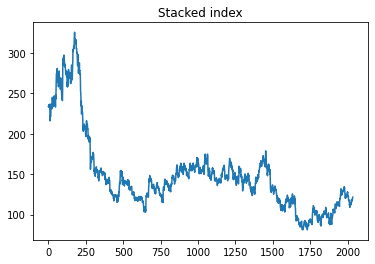

In [8]:
plt.plot(df1)
plt.title("Stacked index")
# plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [11]:
training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size

1322

In [12]:
test_size

713

In [13]:
train_data[0:5]

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       [0.63378268],
       [0.62234477]])

In [14]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, dataX:0,1,2,3-----99   dataY:100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [17]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp310-cp310-win_amd64.whl (444.1 MB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
     ---------------------------------------- 14.2/14.2 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00
     -------------------------------------- 895.5/895.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 438.7/438.7 kB 1.4 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 19s 469ms/step - loss: 0.0247 - val_loss: 0.0046
Epoch 2/100
20/20 [==============================] - 7s 368ms/step - loss: 0.0031 - val_loss: 9.7055e-04
Epoch 3/100
20/20 [==============================] - 6s 300ms/step - loss: 0.0017 - val_loss: 9.6016e-04
Epoch 4/100
20/20 [==============================] - 6s 313ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 6s 297ms/step - loss: 0.0017 - val_loss: 9.1268e-04
Epoch 6/100
20/20 [==============================] - 6s 312ms/step - loss: 0.0016 - val_loss: 8.5222e-04
Epoch 7/100
20/20 [==============================] - 6s 314ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/100
20/20 [==============================] - 6s 311ms/step - loss: 0.0024 - val_loss: 7.9348e-04
Epoch 9/100
20/20 [==============================] - 6s 310ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 6s 294ms/step - 

20/20 [==============================] - 7s 346ms/step - loss: 3.3915e-04 - val_loss: 3.1354e-04
Epoch 77/100
20/20 [==============================] - 7s 330ms/step - loss: 2.9975e-04 - val_loss: 2.5432e-04
Epoch 78/100
20/20 [==============================] - 7s 335ms/step - loss: 3.1974e-04 - val_loss: 3.1466e-04
Epoch 79/100
20/20 [==============================] - 7s 333ms/step - loss: 3.0018e-04 - val_loss: 3.9777e-04
Epoch 80/100
20/20 [==============================] - 7s 328ms/step - loss: 4.4476e-04 - val_loss: 2.8037e-04
Epoch 81/100
20/20 [==============================] - 6s 328ms/step - loss: 3.0464e-04 - val_loss: 2.9165e-04
Epoch 82/100
20/20 [==============================] - 7s 329ms/step - loss: 2.9738e-04 - val_loss: 2.6445e-04
Epoch 83/100
20/20 [==============================] - 7s 330ms/step - loss: 3.1240e-04 - val_loss: 2.6086e-04
Epoch 84/100
20/20 [==============================] - 7s 330ms/step - loss: 3.2008e-04 - val_loss: 3.4758e-04
Epoch 85/100
20/20 [===

In [23]:
#Lets Do the prediction and check Performance Metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 60ms/step


In [24]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

168.5592334534775

In [26]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

117.42297771334316

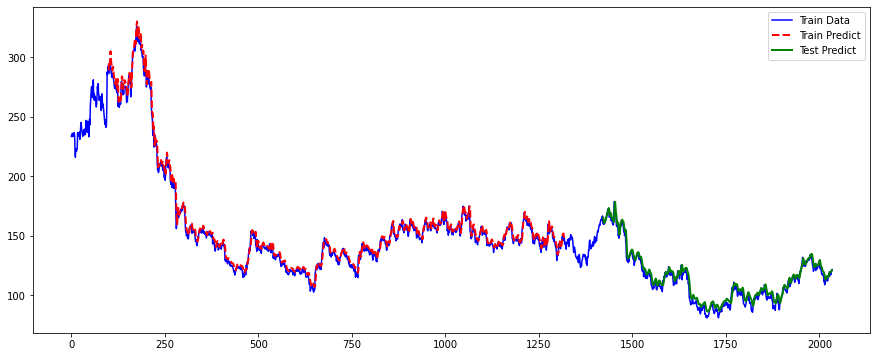

In [27]:
#Plotting Data
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1), '-b', label='Train Data')
plt.plot(trainPredictPlot,'--r', label='Train Predict',linewidth=2.0)
plt.plot(testPredictPlot,'g', label='Test Predict', linewidth=2.0)
leg = plt.legend();
plt.show()